In [2]:
# Referenciando o google drive
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
import shutil
shutil.copy("/content/drive/MyDrive/RenatoBanzai_quali/Dados/dataset4_noaug.zip", "./")

#2min

'./dataset4_noaug.zip'

In [4]:
!unzip -qq "./dataset4_noaug.zip"
#1min

In [5]:
import torch, torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import time
from torchsummary import summary

import numpy as np
import matplotlib.pyplot as plt
import os

from PIL import Image

In [6]:
import torchvision.transforms.functional as F

class SquarePad:
	def __call__(self, image):
		w, h = image.size
		max_wh = np.max([w, h])
		hp = int((max_wh - w) / 2)
		vp = int((max_wh - h) / 2)
		padding = (hp, vp, hp, vp)
		return F.pad(image, padding, 0, 'constant')


trans = transforms.Compose([
        #SquarePad(),
        transforms.Resize(size=(224,224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
])

In [7]:
# Load the Data

# Set train and valid directory paths

dataset = 'dataset4'

train_directory = os.path.join(dataset, 'train')
valid_directory = os.path.join(dataset, 'validation')
test_directory = os.path.join(dataset, 'test')



# Batch size
bs = 512

# Number of classes
num_classes = len(os.listdir(valid_directory))  #10#2#257
print(num_classes)

# Load Data from folders
data = {
    'train': datasets.ImageFolder(root=train_directory, transform=trans),
    'valid': datasets.ImageFolder(root=valid_directory, transform=trans),
    'test': datasets.ImageFolder(root=test_directory, transform=trans)
}

# Get a mapping of the indices to the class names, in order to see the output classes of the test images.
idx_to_class = {v: k for k, v in data['train'].class_to_idx.items()}
print(idx_to_class)

# Size of Data, to be used for calculating Average Loss and Accuracy
train_data_size = len(data['train'])
valid_data_size = len(data['valid'])
test_data_size = len(data['test'])

# Create iterators for the Data loaded using DataLoader module
train_data_loader = DataLoader(data['train'], batch_size=bs, shuffle=True, num_workers=2)
valid_data_loader = DataLoader(data['valid'], batch_size=bs, shuffle=True, num_workers=2)
test_data_loader = DataLoader(data['test'], num_workers=2)

68
{0: 'Abramites hypselonotus', 1: 'Acestrorhynchus pantaneiro', 2: 'Apareiodon affinis', 3: 'Aphyocharax anisitsi', 4: 'Aphyocharax paraguayensis', 5: 'Aphyocharax rathbuni', 6: 'Apistogramma borellii', 7: 'Apistogramma trifasciata', 8: 'Apteronotus albifrons', 9: 'Astronotus crassipinnis', 10: 'Brochis britskii', 11: 'Brochis splendens', 12: 'Brycon hilarii', 13: 'Bujurquina vittata', 14: 'Callichthys callichthys', 15: 'Catathyridium jenynsii', 16: 'Catoprion mento', 17: 'Cichlasoma dimerus', 18: 'Corydoras aeneus', 19: 'Corydoras hastatus', 20: 'Crenicichla lepidota', 21: 'Eigenmannia virescens', 22: 'Gasteropelecus sternicla', 23: 'Gymnocorymbus ternetzi', 24: 'Gymnogeophagus balzanii', 25: 'Gymnotus inaequilabiatus', 26: 'Hemigrammus ulreyi', 27: 'Hoplias malabaricus', 28: 'Hoplosternum littorale', 29: 'Hyphessobrycon anisitsi', 30: 'Hyphessobrycon elachys', 31: 'Hyphessobrycon eques', 32: 'Hyphessobrycon herbertaxelrodi', 33: 'Laetacara dorsigera', 34: 'Lepidosiren paradoxa', 35

In [7]:
train_data_size, valid_data_size, test_data_size

(11600, 3871, 3900)

In [8]:
alexnet = models.alexnet(pretrained=True)
alexnet

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


100%|██████████| 233M/233M [00:01<00:00, 207MB/s]


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [9]:
# Freeze model parameters
for param in alexnet.parameters():
    param.requires_grad = False

In [10]:
k = 1
for param in alexnet.parameters():
  k += 1
print(k)

17


In [11]:
# Change the final layer of AlexNet Model for Transfer Learning
alexnet.classifier[6] = nn.Linear(4096, num_classes)
alexnet.classifier.add_module("7", nn.LogSoftmax(dim = 1))
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [12]:
alexnet.cuda()
summary(alexnet, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 55, 55]          23,296
              ReLU-2           [-1, 64, 55, 55]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-1, 25

In [13]:
# Define Optimizer and Loss Function
loss_func = nn.NLLLoss()
optimizer = optim.Adam(alexnet.parameters(), lr=0.001)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

In [14]:
def train_and_validate(model, loss_criterion, optimizer, epochs=25):
    '''
    Function to train and validate
    Parameters
        :param model: Model to train and validate
        :param loss_criterion: Loss Criterion to minimize
        :param optimizer: Optimizer for computing gradients
        :param epochs: Number of epochs (default=25)

    Returns
        model: Trained Model with best validation accuracy
        history: (dict object): Having training loss, accuracy and validation loss, accuracy
    '''

    start = time.time()
    history = []
    best_acc = 0.0

    for epoch in range(epochs):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))

        # Set to training mode
        model.train()

        # Loss and Accuracy within the epoch
        train_loss = 0.0
        train_acc = 0.0

        valid_loss = 0.0
        valid_acc = 0.0

        for i, (inputs, labels) in enumerate(train_data_loader):

            inputs = inputs.to(device)
            labels = labels.to(device)

            # Clean existing gradients
            optimizer.zero_grad()

            # Forward pass - compute outputs on input data using the model
            outputs = model(inputs)

            # Compute loss
            loss = loss_criterion(outputs, labels)

            # Backpropagate the gradients
            loss.backward()

            # Update the parameters
            optimizer.step()

            # Compute the total loss for the batch and add it to train_loss
            train_loss += loss.item() * inputs.size(0)

            # Compute the accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))

            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))

            # Compute total accuracy in the whole batch and add to train_acc
            train_acc += acc.item() * inputs.size(0)

            #print("Batch number: {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}".format(i, loss.item(), acc.item()))


        # Validation - No gradient tracking needed
        with torch.no_grad():

            # Set to evaluation mode
            model.eval()

            # Validation loop
            for j, (inputs, labels) in enumerate(valid_data_loader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass - compute outputs on input data using the model
                outputs = model(inputs)

                # Compute loss
                loss = loss_criterion(outputs, labels)

                # Compute the total loss for the batch and add it to valid_loss
                valid_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                # Convert correct_counts to float and then compute the mean
                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                # Compute total accuracy in the whole batch and add to valid_acc
                valid_acc += acc.item() * inputs.size(0)

                #print("Validation Batch number: {:03d}, Validation: Loss: {:.4f}, Accuracy: {:.4f}".format(j, loss.item(), acc.item()))

        # Find average training loss and training accuracy
        avg_train_loss = train_loss/train_data_size
        avg_train_acc = train_acc/train_data_size

        # Find average training loss and training accuracy
        avg_valid_loss = valid_loss/valid_data_size
        avg_valid_acc = valid_acc/valid_data_size

        history.append([avg_train_loss, avg_valid_loss, avg_train_acc, avg_valid_acc])

        epoch_end = time.time()

        print("Epoch : {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}%, \n\t\tValidation : Loss : {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(epoch+1, avg_train_loss, avg_train_acc*100, avg_valid_loss, avg_valid_acc*100, epoch_end-epoch_start))

        if avg_valid_acc > 0.81:
          return model, history

        # Save if the model has best accuracy till now
        #torch.save(model, '/content/drive/MyDrive/RenatoBanzai_quali/Dados/model_'+str(epoch)+'.pt')

    return model, history

In [15]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

num_epochs = 10
trained_model, history = train_and_validate(alexnet, loss_func, optimizer, num_epochs)


#l4gpu 142s/epoch

Epoch: 1/10
Epoch : 001, Training: Loss: 2.4422, Accuracy: 39.3879%, 
		Validation : Loss : 1.6433, Accuracy: 56.5487%, Time: 26.6406s
Epoch: 2/10
Epoch : 002, Training: Loss: 1.2882, Accuracy: 64.6293%, 
		Validation : Loss : 1.3892, Accuracy: 62.7228%, Time: 27.2537s
Epoch: 3/10
Epoch : 003, Training: Loss: 1.0030, Accuracy: 72.5172%, 
		Validation : Loss : 1.3017, Accuracy: 65.0995%, Time: 27.5014s
Epoch: 4/10
Epoch : 004, Training: Loss: 0.8389, Accuracy: 77.4138%, 
		Validation : Loss : 1.2416, Accuracy: 66.4428%, Time: 27.2574s
Epoch: 5/10
Epoch : 005, Training: Loss: 0.7158, Accuracy: 81.0086%, 
		Validation : Loss : 1.2087, Accuracy: 67.5278%, Time: 27.5374s
Epoch: 6/10
Epoch : 006, Training: Loss: 0.6225, Accuracy: 83.8017%, 
		Validation : Loss : 1.1903, Accuracy: 67.9411%, Time: 28.4322s
Epoch: 7/10
Epoch : 007, Training: Loss: 0.5494, Accuracy: 85.9655%, 
		Validation : Loss : 1.1725, Accuracy: 68.4578%, Time: 26.8044s
Epoch: 8/10
Epoch : 008, Training: Loss: 0.4984, Accura

In [16]:
torch.save(history, '/content/drive/MyDrive/RenatoBanzai_quali/Codigo/'+'history_alex_dataset4_noaug.pt')
torch.save(trained_model, '/content/drive/MyDrive/RenatoBanzai_quali/Codigo/'+'model_alex_dataset4_noaug.pt')

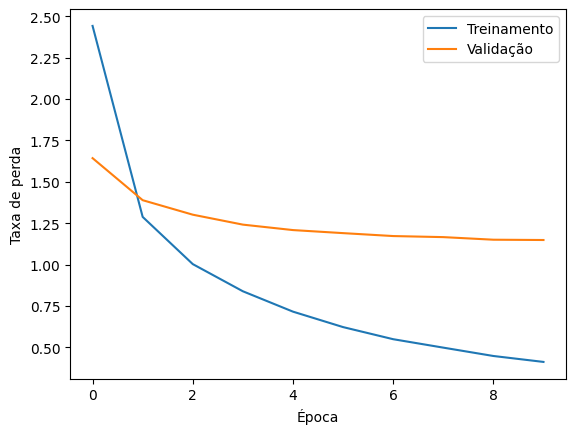

In [17]:
history = np.array(history)
plt.plot(history[:,0:2])
plt.legend(['Treinamento', 'Validação'])
plt.xlabel('Época')
plt.ylabel('Taxa de perda')
# plt.ylim(0,1)
plt.savefig(dataset+'_loss_curve.png')
plt.show()

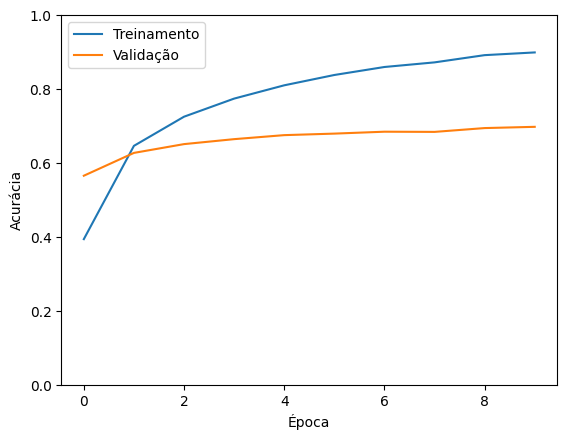

In [18]:
plt.plot(history[:,2:4])
plt.legend(['Treinamento', 'Validação'])
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.ylim(0,1)
plt.savefig(dataset+'_accuracy_curve.png')
plt.show()

In [19]:
import cv2

def predict(model, test_image_name, new=False):
    '''
    Function to predict the class of a single test image
    Parameters
        :param model: Model to test
        :param test_image_name: Test image

    '''
    model.cuda()
    transform = trans
    if new==False:
      test_image = Image.open(test_image_name)
    else:
      test_image = cv2.imread(test_image_name)
      test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB )
      test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB )
      test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB )
      test_image = Image.fromarray(test_image)

    plt.imshow(test_image)
    test_image_tensor = transform(test_image)
    if torch.cuda.is_available():
        test_image_tensor = test_image_tensor.view(1, 3, 224, 224).cuda()
    else:
        test_image_tensor = test_image_tensor.view(1, 3, 224, 224)

    with torch.no_grad():
        model.eval()
        # Model outputs log probabilities
        out = model(test_image_tensor)
        ps = torch.exp(out)
        topk, topclass = ps.topk(3, dim=1)

        for i in range(3):
            print("Predcition", i+1, ":", idx_to_class[topclass.cpu().numpy()[0][i]], ", Score: ", topk.cpu().numpy()[0][i])

In [20]:
predict(trained_model, "/content/dataset4/test/Salminus brasiliensis/20_09320.jpg")

Predcition 1 : Salminus brasiliensis , Score:  0.99571323
Predcition 2 : Apistogramma borellii , Score:  0.00411713
Predcition 3 : Brycon hilarii , Score:  0.00014924486


In [21]:
predict(trained_model, "/content/dataset4/test/Abramites hypselonotus/01_00219.jpg")

Predcition 1 : Abramites hypselonotus , Score:  0.5741219
Predcition 2 : Gymnocorymbus ternetzi , Score:  0.10979099
Predcition 3 : Otocinclus vittatus , Score:  0.1057252


Predcition 1 : Abramites hypselonotus , Score:  0.9810157
Predcition 2 : Platydoras armatulus , Score:  0.012467231
Predcition 3 : Leporinus striatus , Score:  0.0025645362


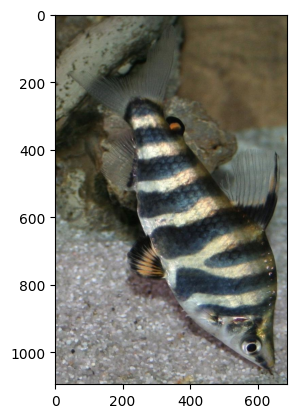

In [22]:
predict(trained_model,"/content/dataset4/test/Abramites hypselonotus/01_00224.jpg")

Predcition 1 : Aphyocharax rathbuni , Score:  0.30524403
Predcition 2 : Acestrorhynchus pantaneiro , Score:  0.18291198
Predcition 3 : Megalamphodus megalopterus , Score:  0.15909153


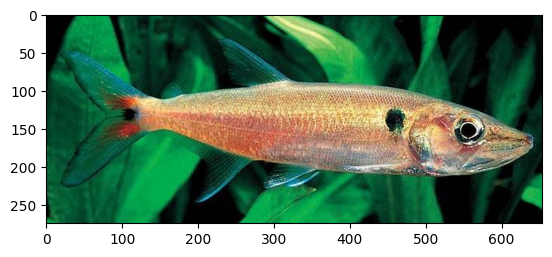

In [23]:
predict(trained_model,"/content/dataset4/test/Acestrorhynchus pantaneiro/04_00725.jpg")

Predcition 1 : Sorubim lima , Score:  0.47178304
Predcition 2 : Brycon hilarii , Score:  0.29289937
Predcition 3 : Hyphessobrycon herbertaxelrodi , Score:  0.058938395


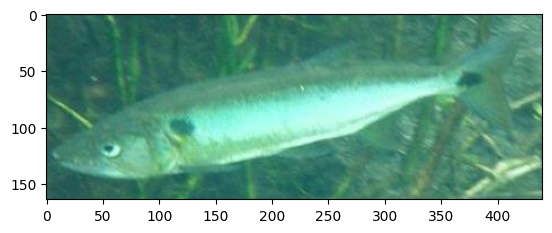

In [24]:
predict(trained_model,"/content/dataset4/test/Acestrorhynchus pantaneiro/04_00736.jpg")

Predcition 1 : Hemigrammus ulreyi , Score:  0.49419886
Predcition 2 : Apareiodon affinis , Score:  0.21477008
Predcition 3 : Rhaphiodon vulpinus , Score:  0.06992861


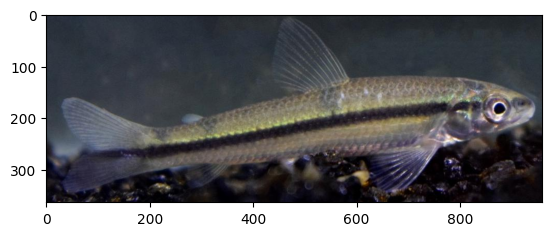

In [25]:
predict(trained_model,"/content/dataset4/test/Apareiodon affinis/52_20487.jpg")

Predcition 1 : Otocinclus vittatus , Score:  0.457078
Predcition 2 : Apareiodon affinis , Score:  0.20930766
Predcition 3 : Platydoras armatulus , Score:  0.18694583


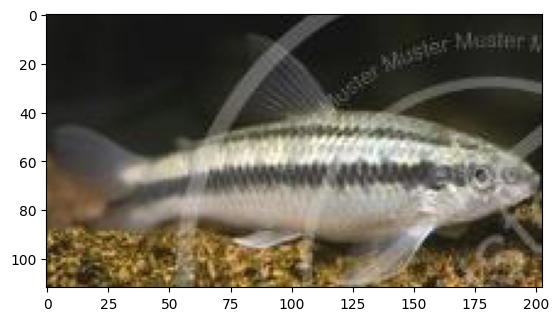

In [26]:
predict(trained_model,"/content/dataset4/test/Apareiodon affinis/52_20493.jpg")

Predcition 1 : Aphyocharax anisitsi , Score:  0.73781353
Predcition 2 : Aphyocharax rathbuni , Score:  0.22049703
Predcition 3 : Hyphessobrycon anisitsi , Score:  0.024145503


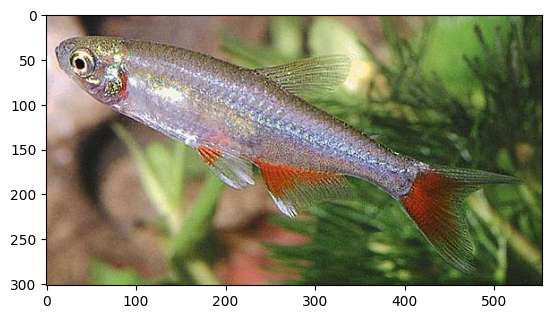

In [27]:
predict(trained_model,"/content/dataset4/test/Aphyocharax anisitsi/05_00873.jpg")

In [28]:
test_loss = 0
test_acc = 0
all_labels = []
all_predictions = []

# Validation - No gradient tracking needed
with torch.no_grad():

    # Set to evaluation mode
    trained_model.eval()

    # Validation loop
    for j, (inputs, labels) in enumerate(test_data_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)
        all_labels.append(labels.item())

        # Forward pass - compute outputs on input data using the model
        outputs = trained_model(inputs)

        # Compute loss
        loss = loss_func(outputs, labels)

        # Compute the total loss for the batch and add it to valid_loss
        test_loss += loss.item() * inputs.size(0)

        # Calculate validation accuracy
        ret, predictions = torch.max(outputs.data, 1)
        all_predictions.append(predictions.item())
        correct_counts = predictions.eq(labels.data.view_as(predictions))

        # Convert correct_counts to float and then compute the mean
        acc = torch.mean(correct_counts.type(torch.FloatTensor))

        # Compute total accuracy in the whole batch and add to valid_acc
        test_acc += acc.item() * inputs.size(0)

        #print("Validation Batch number: {:03d}, Validation: Loss: {:.4f}, Accuracy: {:.4f}".format(j, loss.item(), acc.item()))

test_acc/test_data_size

0.7148717948717949

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# or:
# from tensorflow.math import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt


cm = confusion_matrix(all_labels, all_predictions)
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)
precision

array([0.86046512, 0.75      , 0.64285714, 0.7037037 , 0.78571429,
       0.57894737, 0.72916667, 0.75510204, 0.74418605, 0.77777778,
       0.52      , 0.68493151, 0.76082474, 0.53191489, 0.5       ,
       0.70588235, 0.63157895, 0.375     , 0.57471264, 0.69590643,
       0.61538462, 0.84210526, 0.92857143, 0.77173913, 0.6       ,
       0.64      , 0.51219512, 0.54117647, 0.6       , 0.72      ,
       0.77419355, 0.8597561 , 0.79787234, 0.72413793, 0.69047619,
       0.6       , 0.68      , 0.86363636, 0.68589744, 0.71153846,
       0.82857143, 0.83333333, 0.65432099, 0.71875   , 0.74285714,
       0.5625    , 0.69565217, 0.52083333, 0.57894737, 0.80487805,
       0.83333333, 0.69565217, 0.85714286, 0.63157895, 0.56097561,
       0.84210526, 0.48484848, 0.77224199, 0.46666667, 0.625     ,
       0.86666667, 0.93333333, 0.65217391, 0.65079365, 0.60714286,
       0.78787879, 0.7173913 , 0.6       ])

In [30]:
top_k_indices = np.argpartition(precision, -10)[-10:]
for x in top_k_indices:
  print(idx_to_class[x], precision[x])

Potamotrygon motoro 0.8333333333333334
Eigenmannia virescens 0.8421052631578947
Pseudotylosurus angusticeps 0.8421052631578947
Pseudohemiodon platycephalus 0.8571428571428571
Hyphessobrycon eques 0.8597560975609756
Abramites hypselonotus 0.8604651162790697
Leporinus striatus 0.8636363636363636
Salminus brasiliensis 0.8666666666666667
Gasteropelecus sternicla 0.9285714285714286
Schizodon isognathus 0.9333333333333333


In [31]:
bot_k_indices = np.argpartition(precision, 10)[:10]
for x in bot_k_indices:
  print(idx_to_class[x], precision[x])

Cichlasoma dimerus 0.375
Rhaphiodon vulpinus 0.4666666666666667
Pterodoras granulosus 0.48484848484848486
Callichthys callichthys 0.5
Hemigrammus ulreyi 0.5121951219512195
Brochis britskii 0.52
Pincachara 0.5208333333333334
Bujurquina vittata 0.5319148936170213
Hoplias malabaricus 0.5411764705882353
Pseudoplatystoma fasciatum 0.5609756097560976


In [32]:
np.mean(precision)

np.float64(0.691072378329458)

In [33]:
import copy

alex = copy.deepcopy(trained_model)
# Extract convolutional layers and their weights
conv_weights = []  # List to store convolutional layer weights
conv_layers = []  # List to store convolutional layers
total_conv_layers = 0  # Counter for total convolutional layers
for module in alex.features.children():
    if isinstance(module, nn.Conv2d):
        total_conv_layers += 1
        conv_weights.append(module.weight)
        conv_layers.append(module)

print(f"Total convolution layers: {total_conv_layers}")

Total convolution layers: 5


In [34]:
input_image = Image.open(str('/content/dataset4/train/Salminus brasiliensis/20_09344_0.jpg')) # add your image path
plt.imshow(input_image)
plt.show()
# Preprocess the image and move it to GPU
input_image = trans(input_image)
input_image = input_image.unsqueeze(0)  # Add a batch dimension
input_image = input_image.to(device)

# Extract feature maps
feature_maps = []  # List to store feature maps
layer_names = []  # List to store layer names
for layer in conv_layers:
    input_image = layer(input_image)
    feature_maps.append(input_image)
    layer_names.append(str(layer))

In [35]:
import torch.nn.functional as Fu
for param in trained_model.parameters():
  param.requires_grad = True


def grad_cam_alexnet(model, image_path):
  with torch.enable_grad():
    img = Image.open(image_path)
    print("a")
    input_tensor = trans(img)
    print("b")
    model.eval()

    target_layer = model.features[10]
    activations = {}
    grads = {}

    def forward_hook(module, input, output):
        #print("forward_hook")
        activations['value'] = output.detach()

    def backward_hook(module, grad_in, grad_out):
        #print("backward_hook")
        grads['value'] = grad_out[0].detach()

    forward_handle = target_layer.register_forward_hook(forward_hook)
    backward_handle = target_layer.register_backward_hook(backward_hook)

    output = model(input_tensor.unsqueeze(0).cuda())              # shape (1, 1000)
    print("shape", output.shape)
    class_idx = output.argmax(dim=1).item()   # ou escolha manualmente
    score = output[0, class_idx]
    print("score", score)
    model.zero_grad()
    score.cuda().backward()

    # a) médias globais dos gradientes (α_k no artigo)
    weights = grads['value'].mean(dim=(2, 3), keepdim=True)  # shape (C,1,1)

    # b) combinação linear das feature maps ponderadas
    gcam = (weights * activations['value']).sum(dim=1, keepdim=True)

    # c) ReLU (descartamos valores negativos)
    gcam = Fu.relu(gcam)

    # d) normalizar para [0,1]
    gcam = Fu.interpolate(gcam, size=(224, 224), mode='bilinear', align_corners=False)
    gcam = gcam[0, 0].cpu().numpy()
    gcam = (gcam - gcam.min()) / (gcam.max() - gcam.min() + 1e-8)

    heatmap = plt.cm.jet(gcam)[:, :, :3]      # remove canal alfa
    heatmap = (heatmap * 255).astype(np.uint8)

    # converter entrada pré-processada de volta para RGB
    inv_norm = transforms.Normalize(
        mean=[-m/s for m, s in zip([0.485, 0.456, 0.406],
                                  [0.229, 0.224, 0.225])],
        std=[1/s for s in [0.229, 0.224, 0.225]]
    )
    img_rgb = inv_norm(input_tensor).clamp(0, 1).permute(1, 2, 0).numpy()
    img_rgb = (img_rgb * 255).astype(np.uint8)

    # sobreposição simples: 40 % heatmap + 60 % imagem
    overlay = (0.6 * img_rgb + 0.4 * heatmap).astype(np.uint8)

    plt.imshow(overlay)
    plt.axis('off')
    plt.title(f"Grad-CAM – classe {class_idx}")
    plt.show()

    backward_handle.remove()
    forward_handle.remove()

a
b
shape torch.Size([1, 68])
score 

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:1864: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


tensor(-0.0057, device='cuda:0', grad_fn=<SelectBackward0>)


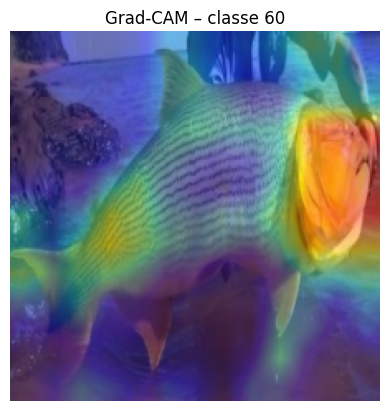

In [36]:
grad_cam_alexnet(trained_model, '/content/dataset4/train/Salminus brasiliensis/20_09344_0.jpg')

a
b
shape torch.Size([1, 68])
score tensor(-0.0043, device='cuda:0', grad_fn=<SelectBackward0>)


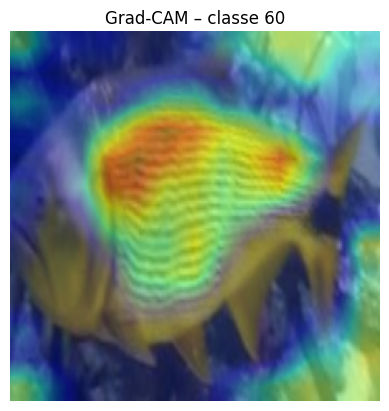

In [37]:
grad_cam_alexnet(trained_model, '/content/dataset4/test/Salminus brasiliensis/20_09320.jpg')

a
b
shape torch.Size([1, 68])
score tensor(-0.0149, device='cuda:0', grad_fn=<SelectBackward0>)


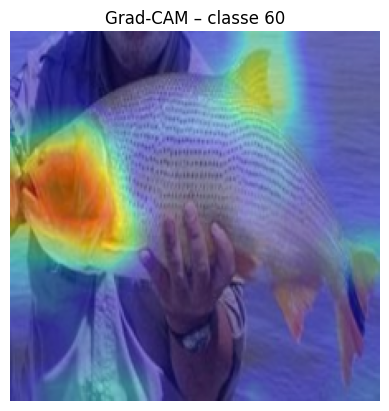

In [38]:
grad_cam_alexnet(trained_model, '/content/dataset4/test/Salminus brasiliensis/20_09405.jpg')

a
b
shape torch.Size([1, 68])
score tensor(-0.0192, device='cuda:0', grad_fn=<SelectBackward0>)


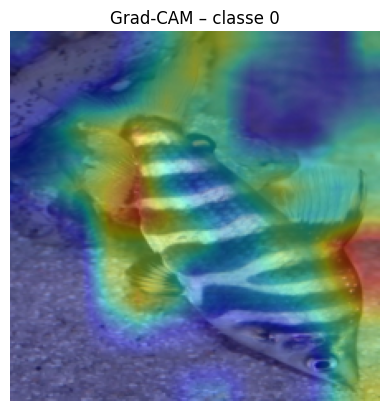

In [39]:
grad_cam_alexnet(trained_model,"/content/dataset4/test/Abramites hypselonotus/01_00224.jpg")

a
b
shape torch.Size([1, 68])
score tensor(-0.5549, device='cuda:0', grad_fn=<SelectBackward0>)


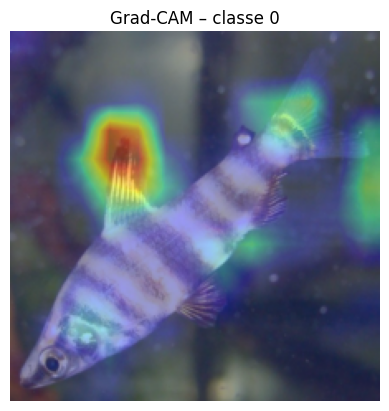

In [40]:
grad_cam_alexnet(trained_model, "/content/dataset4/test/Abramites hypselonotus/01_00219.jpg")

In [41]:
grad_cam_alexnet(trained_model,"/content/dataset4/test/Apareiodon affinis/52_20487.jpg")

a
b
shape torch.Size([1, 68])
score tensor(-0.7048, device='cuda:0', grad_fn=<SelectBackward0>)


In [42]:
grad_cam_alexnet(trained_model,"/content/dataset4/test/Apareiodon affinis/52_20493.jpg")

a
b
shape torch.Size([1, 68])
score tensor(-0.7829, device='cuda:0', grad_fn=<SelectBackward0>)


a
b
shape torch.Size([1, 68])
score tensor(-0.3041, device='cuda:0', grad_fn=<SelectBackward0>)


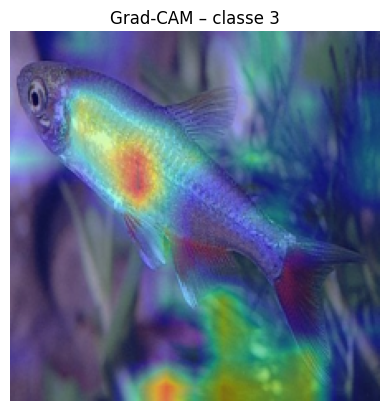

In [43]:
grad_cam_alexnet(trained_model,"/content/dataset4/test/Aphyocharax anisitsi/05_00873.jpg")

a
b
shape torch.Size([1, 68])
score tensor(-1.1866, device='cuda:0', grad_fn=<SelectBackward0>)


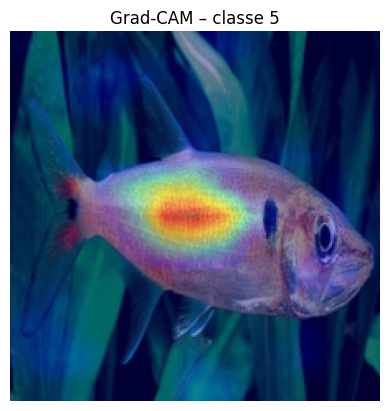

In [44]:
grad_cam_alexnet(trained_model,"/content/dataset4/test/Acestrorhynchus pantaneiro/04_00725.jpg")

a
b
shape torch.Size([1, 68])
score tensor(-0.7512, device='cuda:0', grad_fn=<SelectBackward0>)


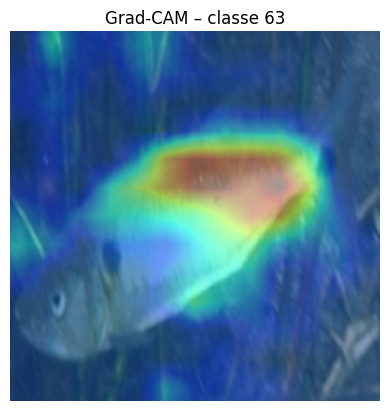

In [45]:
grad_cam_alexnet(trained_model,"/content/dataset4/test/Acestrorhynchus pantaneiro/04_00736.jpg")

In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("precision_score", precision_score(all_labels, all_predictions, average='weighted'))
print("recall_score", recall_score(all_labels, all_predictions, average='weighted'))
print("f1_score", f1_score(all_labels, all_predictions, average='weighted'))

precision_score 0.7178937684496491
recall_score 0.7148717948717949
f1_score 0.7102481202117285


In [47]:
import torch.nn.functional as Fu
for param in trained_model.parameters():
  param.requires_grad = True


def grad_cam_alexnet_graph(model, image_path):
  with torch.enable_grad():
    img = Image.open(image_path)
    #print("a")
    input_tensor = trans(img)
    #print("b")
    model.eval()

    target_layer = model.features[10]
    activations = {}
    grads = {}

    def forward_hook(module, input, output):
        #print("forward_hook")
        activations['value'] = output.detach()

    def backward_hook(module, grad_in, grad_out):
        #print("backward_hook")
        grads['value'] = grad_out[0].detach()

    forward_handle = target_layer.register_forward_hook(forward_hook)
    backward_handle = target_layer.register_backward_hook(backward_hook)

    output = model(input_tensor.unsqueeze(0).cuda())              # shape (1, 1000)
    #print("shape", output.shape)
    class_idx = output.argmax(dim=1).item()   # ou escolha manualmente
    score = output[0, class_idx]
    #print("score", score)
    model.zero_grad()
    score.cuda().backward()

    # a) médias globais dos gradientes (α_k no artigo)
    weights = grads['value'].mean(dim=(2, 3), keepdim=True)  # shape (C,1,1)

    # b) combinação linear das feature maps ponderadas
    gcam = (weights * activations['value']).sum(dim=1, keepdim=True)

    # c) ReLU (descartamos valores negativos)
    gcam = Fu.relu(gcam)

    # d) normalizar para [0,1]
    gcam = Fu.interpolate(gcam, size=(224, 224), mode='bilinear', align_corners=False)
    gcam = gcam[0, 0].cpu().numpy()
    gcam = (gcam - gcam.min()) / (gcam.max() - gcam.min() + 1e-8)

    heatmap = plt.cm.jet(gcam)[:, :, :3]      # remove canal alfa
    heatmap = (heatmap * 255).astype(np.uint8)

    # converter entrada pré-processada de volta para RGB
    inv_norm = transforms.Normalize(
        mean=[-m/s for m, s in zip([0.485, 0.456, 0.406],
                                  [0.229, 0.224, 0.225])],
        std=[1/s for s in [0.229, 0.224, 0.225]]
    )
    img_rgb = inv_norm(input_tensor).clamp(0, 1).permute(1, 2, 0).numpy()
    img_rgb = (img_rgb * 255).astype(np.uint8)

    # sobreposição simples: 40 % heatmap + 60 % imagem
    overlay = (0.6 * img_rgb + 0.4 * heatmap).astype(np.uint8)

    backward_handle.remove()
    forward_handle.remove()

    return (overlay, class_idx)

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:1864: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


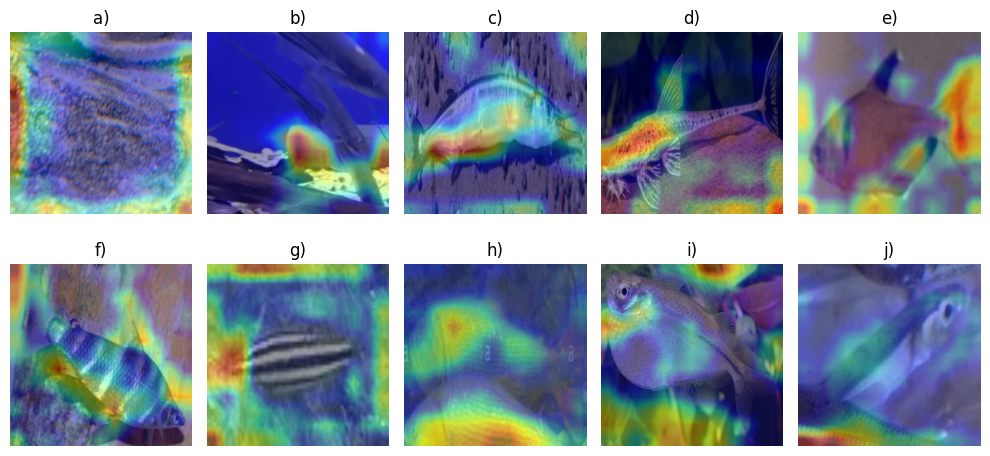

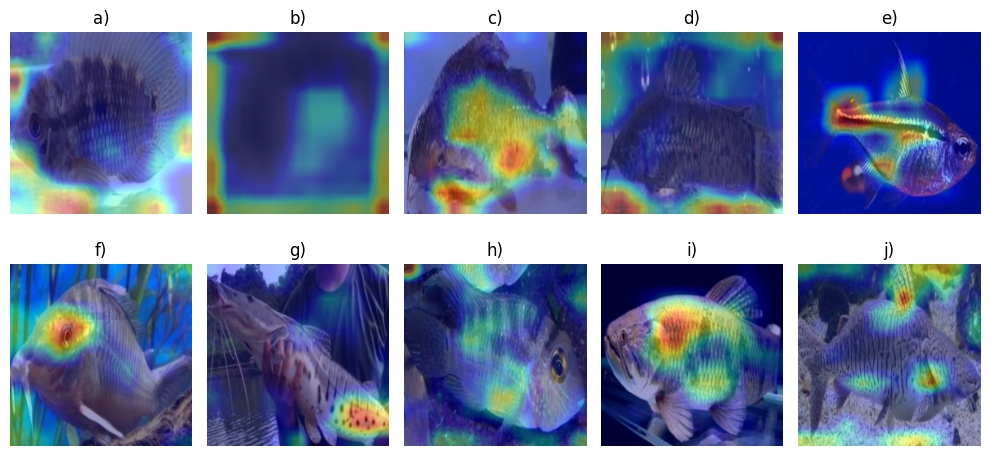

In [50]:
#print gradcam grid
import os

def print_gradcam_grid(k_indices):
  title_char = 65
  linha = 0
  coluna = 0
  test_path= "/content/dataset4/test/"
  fig, axes = plt.subplots(2, 5, figsize=(10, 5)) # Create a 2x2 grid of subplots
  for x in k_indices:
    specie_path=test_path + idx_to_class[x]
    list_files = os.listdir(specie_path)
    img_path = specie_path + "/" + list_files[3]
    grafico, class_idx = grad_cam_alexnet_graph(trained_model, img_path)
    axes[linha, coluna].axis('off')
    axes[linha, coluna].imshow(grafico)
    axes[linha, coluna].set_title(f"{chr(title_char).lower()})")
    if coluna >= 4:
      coluna = 0
      linha += 1
    else:
      coluna += 1
    title_char += 1
  plt.tight_layout()
  plt.show()

    #print(idx_to_class[x], precision[x])


print_gradcam_grid(top_k_indices)
print_gradcam_grid(bot_k_indices)

In [8]:
alexnet_precision = [0.86046512, 0.75      , 0.64285714, 0.7037037 , 0.78571429,
       0.57894737, 0.72916667, 0.75510204, 0.74418605, 0.77777778,
       0.52      , 0.68493151, 0.76082474, 0.53191489, 0.5       ,
       0.70588235, 0.63157895, 0.375     , 0.57471264, 0.69590643,
       0.61538462, 0.84210526, 0.92857143, 0.77173913, 0.6       ,
       0.64      , 0.51219512, 0.54117647, 0.6       , 0.72      ,
       0.77419355, 0.8597561 , 0.79787234, 0.72413793, 0.69047619,
       0.6       , 0.68      , 0.86363636, 0.68589744, 0.71153846,
       0.82857143, 0.83333333, 0.65432099, 0.71875   , 0.74285714,
       0.5625    , 0.69565217, 0.52083333, 0.57894737, 0.80487805,
       0.83333333, 0.69565217, 0.85714286, 0.63157895, 0.56097561,
       0.84210526, 0.48484848, 0.77224199, 0.46666667, 0.625     ,
       0.86666667, 0.93333333, 0.65217391, 0.65079365, 0.60714286,
       0.78787879, 0.7173913 , 0.6       ]

efficientnet_precision = [0.93023256, 0.7826087 , 0.75      , 0.73786408, 0.68181818,
       0.75      , 0.81395349, 0.82692308, 0.72727273, 0.8974359 ,
       0.71428571, 0.69444444, 0.80299786, 0.56756757, 0.56521739,
       0.85714286, 0.73913043, 0.57575758, 0.796875  , 0.62650602,
       0.69565217, 0.77777778, 0.79411765, 0.75728155, 0.58974359,
       0.45      , 0.82608696, 0.78787879, 0.7       , 0.61666667,
       0.68421053, 0.78977273, 0.82795699, 0.67605634, 0.61363636,
       0.8       , 0.60526316, 0.83870968, 0.77862595, 0.76785714,
       0.7       , 0.74468085, 0.86956522, 0.60465116, 0.65      ,
       0.8       , 0.875     , 0.625     , 0.73076923, 0.84615385,
       0.94339623, 0.6744186 , 0.70588235, 0.56666667, 0.69767442,
       0.85714286, 0.69230769, 0.77121771, 0.75      , 0.83333333,
       0.83673469, 0.84210526, 0.82051282, 0.73529412, 0.8       ,
       0.73333333, 0.62264151, 0.75757576]

yolo_precision = [    0.95652,     0.95833,     0.93333,     0.98864,     0.93333,     0.88889,     0.93478,           1,     0.87805,        0.88,        0.75,     0.87838,     0.93793,     0.78261,     0.61905,        0.75,     0.95455,     0.83871,     0.94286,     0.92466,     0.86957,     0.82759,           1,     0.90991,
           0.87879,     0.90909,     0.96667,     0.91045,        0.75,     0.98333,     0.91892,     0.95597,     0.96067,     0.89873,     0.74419,        0.95,        0.75,     0.88235,     0.92086,     0.95312,        0.95,     0.94505,      0.9726,     0.70732,     0.66667,     0.88889,        0.96,     0.67347,
           0.58333,     0.79592,     0.96429,     0.90244,         0.9,     0.84211,     0.75556,     0.87879,     0.78788,       0.948,           1,        0.85,     0.91304,           1,     0.84783,     0.96667,      0.9375,     0.69767,     0.77049,     0.86842]
especies = list(idx_to_class.values())

In [9]:
import pandas as pd
dt = list(zip(especies, alexnet_precision, efficientnet_precision, yolo_precision))
df = pd.DataFrame(dt, columns=['especies', 'alexnet', 'efficientnet', 'yolo'])
df

especies   alexnet  efficientnet     yolo
0       Abramites hypselonotus  0.860465      0.930233  0.95652
1   Acestrorhynchus pantaneiro  0.750000      0.782609  0.95833
2           Apareiodon affinis  0.642857      0.750000  0.93333
3         Aphyocharax anisitsi  0.703704      0.737864  0.98864
4    Aphyocharax paraguayensis  0.785714      0.681818  0.93333
..                         ...       ...           ...      ...
63                Sorubim lima  0.650794      0.735294  0.96667
64          Sturisoma barbatum  0.607143      0.800000  0.93750
65      Synbranchus marmoratus  0.787879      0.733333  0.69767
66   Tetragonopterus argenteus  0.717391      0.622642  0.77049
67     Thoracocharax stellatus  0.600000      0.757576  0.86842

[68 rows x 4 columns]

In [10]:
for x in range(len(alexnet_precision)):
  print(f"\\textit({especies[x]}) & {alexnet_precision[x]:.4f} & {efficientnet_precision[x]:.4f} & {yolo_precision[x]:.4f} \\\\")

\textit(Abramites hypselonotus) & 0.8605 & 0.9302 & 0.9565 \\
\textit(Acestrorhynchus pantaneiro) & 0.7500 & 0.7826 & 0.9583 \\
\textit(Apareiodon affinis) & 0.6429 & 0.7500 & 0.9333 \\
\textit(Aphyocharax anisitsi) & 0.7037 & 0.7379 & 0.9886 \\
\textit(Aphyocharax paraguayensis) & 0.7857 & 0.6818 & 0.9333 \\
\textit(Aphyocharax rathbuni) & 0.5789 & 0.7500 & 0.8889 \\
\textit(Apistogramma borellii) & 0.7292 & 0.8140 & 0.9348 \\
\textit(Apistogramma trifasciata) & 0.7551 & 0.8269 & 1.0000 \\
\textit(Apteronotus albifrons) & 0.7442 & 0.7273 & 0.8780 \\
\textit(Astronotus crassipinnis) & 0.7778 & 0.8974 & 0.8800 \\
\textit(Brochis britskii) & 0.5200 & 0.7143 & 0.7500 \\
\textit(Brochis splendens) & 0.6849 & 0.6944 & 0.8784 \\
\textit(Brycon hilarii) & 0.7608 & 0.8030 & 0.9379 \\
\textit(Bujurquina vittata) & 0.5319 & 0.5676 & 0.7826 \\
\textit(Callichthys callichthys) & 0.5000 & 0.5652 & 0.6190 \\
\textit(Catathyridium jenynsii) & 0.7059 & 0.8571 & 0.7500 \\
\textit(Catoprion mento) & 0.6

In [51]:
top_k_indices

array([50, 21, 55, 52, 31,  0, 37, 60, 22, 61])